In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, cos, sin, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import folium

In [149]:
df2 =pd.read_csv('/Users/rajdipingale/Downloads/Dataset .csv')

Dataset Review

In [150]:
df2.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [151]:
#Only Indian Restraunts
df=df2[df2['Country Code'] == 1]

In [152]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


In [153]:
# Save the indian dataset
original_df = df.copy()

In [154]:
def info(df):
    explore_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    explore_df['missing_amount'] = df.isna().sum()
    explore_df['% missing'] = (df.isna().sum()/len(df)).astype(float)
    explore_df['uniques'] = df.nunique().values
    explore_df['total'] = df.count().values
    return explore_df.style.background_gradient(cmap = 'Greens')
info(df)

,dtypes,missing_amount,% missing,uniques,total
Restaurant ID,int64,0,0.000000,8652,8652
Restaurant Name,object,0,0.000000,6604,8652
Country Code,int64,0,0.000000,1,8652
City,object,0,0.000000,43,8652
Address,object,0,0.000000,8025,8652
Locality,object,0,0.000000,784,8652
Locality Verbose,object,0,0.000000,841,8652
Longitude,float64,0,0.000000,7230,8652
Latitude,float64,0,0.000000,7790,8652
Cuisines,object,0,0.000000,1392,8652


Removing columns that are not useful for machine learning, such as ID, address, etc. 

In [155]:
df.drop(columns=['Country Code', 'Restaurant ID', 'Restaurant Name', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines','Currency'], axis = 1, inplace=True)

In [156]:
df.head()

,City,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,Agra,850,No,No,No,No,3,3.9,Yellow,Good,140
625,Agra,700,No,No,No,No,2,3.5,Yellow,Good,71
626,Agra,500,No,No,No,No,2,3.6,Yellow,Good,94
627,Agra,400,No,No,No,No,2,4.0,Green,Very Good,87
628,Agra,1000,No,No,No,No,3,4.2,Green,Very Good,177


In [157]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,8652.000000,8652.000000,8652.000000,8652.000000
mean,623.370319,1.721683,2.523324,137.212552
std,595.676124,0.852544,1.510986,428.039513
min,0.000000,1.000000,0.000000,0.000000
25%,300.000000,1.000000,2.100000,4.000000
50%,450.000000,2.000000,3.100000,24.000000
75%,700.000000,2.000000,3.600000,100.000000
max,8000.000000,4.000000,4.900000,10934.000000


In [18]:
info(df)

,dtypes,missing_amount,% missing,uniques,total
City,object,0,0.000000,43,8652
Average Cost for two,int64,0,0.000000,79,8652
Currency,object,0,0.000000,1,8652
Has Table booking,object,0,0.000000,2,8652
Has Online delivery,object,0,0.000000,2,8652
Is delivering now,object,0,0.000000,2,8652
Switch to order menu,object,0,0.000000,1,8652
Price range,int64,0,0.000000,4,8652
Aggregate rating,float64,0,0.000000,33,8652
Rating color,object,0,0.000000,6,8652


Removing empty "Aggregate rating" values

In [158]:
df['Aggregate rating'].min()

0.0

In [161]:
df.drop(df[df['Aggregate rating'] == 0].index, inplace = True)

In [162]:
info(df)

,dtypes,missing_amount,% missing,uniques,total
City,object,0,0.000000,43,6513
Average Cost for two,int64,0,0.000000,78,6513
Has Table booking,object,0,0.000000,2,6513
Has Online delivery,object,0,0.000000,2,6513
Is delivering now,object,0,0.000000,2,6513
Switch to order menu,object,0,0.000000,1,6513
Price range,int64,0,0.000000,4,6513
Aggregate rating,float64,0,0.000000,32,6513
Rating color,object,0,0.000000,5,6513
Rating text,object,0,0.000000,5,6513


 Adjusting features values

In [23]:
print(f'Max average cost for two person: {df["Average Cost for two"].max()}')
print(f'Min average cost for two person: {df["Average Cost for two"].min()}')

Max average cost for two person: 8000
Min average cost for two person: 0


but minimum 0 value is not possible

In [163]:
df.drop(df[df["Average Cost for two"] == 0].index, inplace = True)

In [164]:
# Check again
print(f'Min average cost for two person: {df["Average Cost for two"].min()}')

Min average cost for two person: 50


<Axes: xlabel='Average Cost for two', ylabel='Count'>

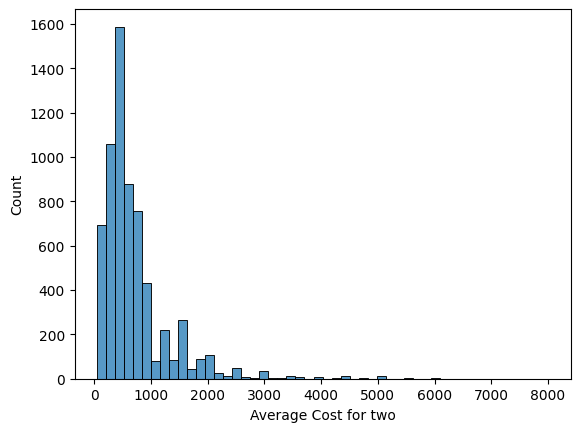

In [30]:
sns.histplot(df, x='Average Cost for two',  bins=50)

## Delivery and Reservation column estimates

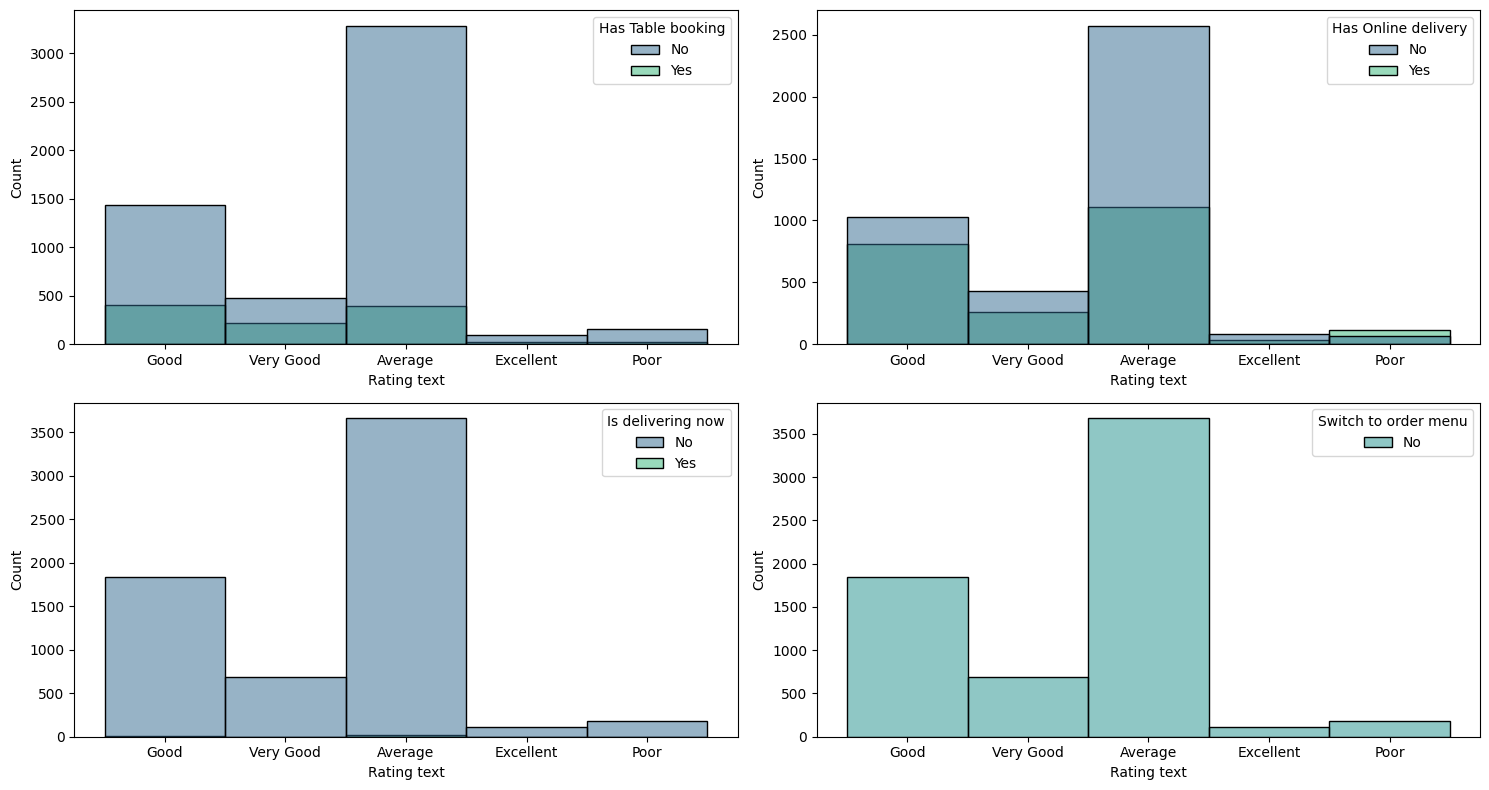

In [169]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.histplot(df, x='Rating text', palette='viridis', hue='Has Table booking', ax=axes[0, 0])
sns.histplot(df, x='Rating text', palette='viridis', hue='Has Online delivery', ax=axes[0, 1])
sns.histplot(df, x='Rating text', palette='viridis', hue='Is delivering now', ax=axes[1, 0])
sns.histplot(df, x='Rating text', palette='viridis', hue='Switch to order menu', ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [170]:
# Checking the ratio of values in the "Is delivering now"
df[['Is delivering now']].value_counts()

Is delivering now
No                   6471
Yes                    33
Name: count, dtype: int64

The feature "Is delivering now" is practically not utilized. <br>The feature "Switch to order menu" has a constant value and holds no meaningful information for machine learning. <br>Drop both features

In [171]:
df.drop(columns=['Is delivering now', 'Switch to order menu'], axis = 1, inplace = True)

convert the features to numerical values:

In [172]:
df['Has Table booking'] = pd.get_dummies(df['Has Table booking'], drop_first = True, prefix='Has_Table_booking', dtype='int')
df['Has Online delivery'] = pd.get_dummies(df['Has Online delivery'], drop_first = True, prefix='Has Online delivery', dtype='int')

In [173]:
df[['Has Table booking', 'Has Online delivery'] ]

,Has Table booking,Has Online delivery
624,0,0
625,0,0
626,0,0
627,0,0
628,0,0
...,...,...
9271,0,0
9272,0,0
9273,0,0
9274,0,0


## Compare 'Votes', 'Rating color' and 'Rating text'	with 'Aggregate rating'

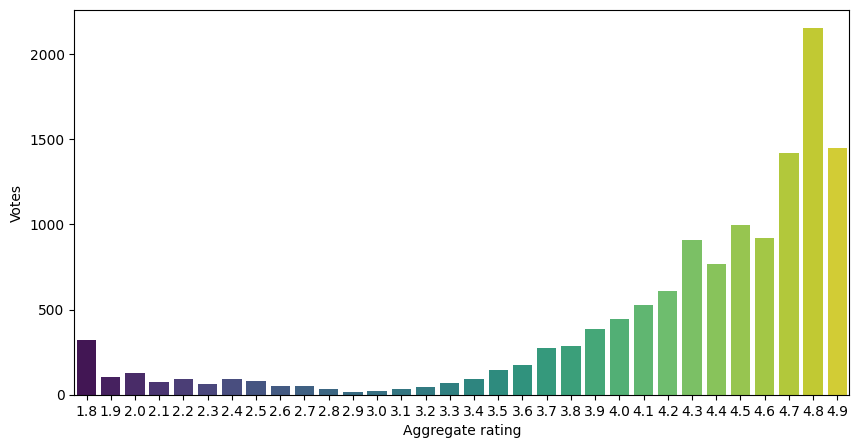

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(df,x='Aggregate rating', y = 'Votes', palette='viridis', errorbar=None)
plt.show()

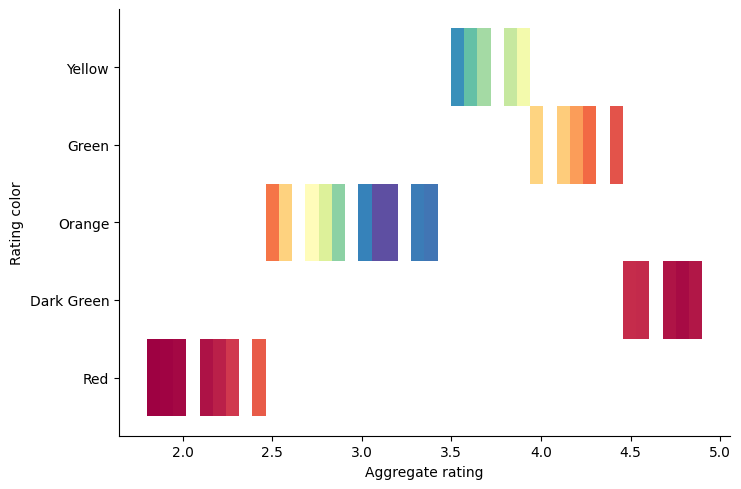

In [40]:
sns.displot(df,x='Aggregate rating', y = 'Rating color', cmap='Spectral', aspect=1.5)

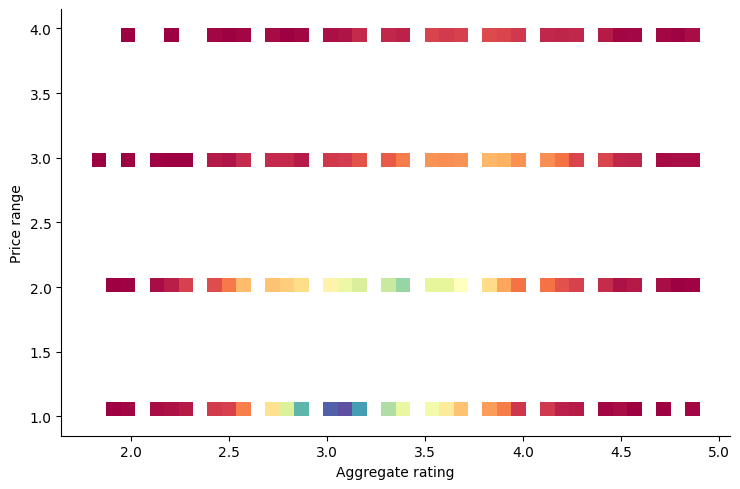

In [41]:
sns.displot(df,x='Aggregate rating', y = 'Price range', cmap='Spectral', aspect=1.5)

<Axes: >

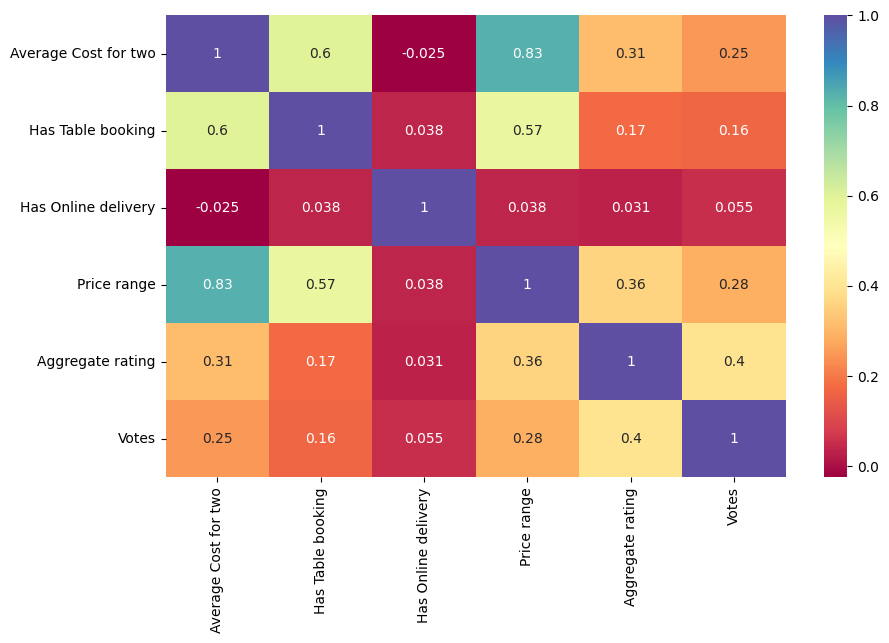

In [42]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'Spectral')

 Training Dataset.

In [174]:
X = df[['Has Table booking', 'Has Online delivery', 'Price range',
       'Votes', 'Average Cost for two']]

In [175]:
y = df['Aggregate rating']


Split and Scale the Dataset.

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 Evaluation Metrics 	

In [56]:
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred)
    return print(f"R2 Score: {SCORE:.4f} \nMean Absolute Error:{MAE:.4f},\nMean Squared Error:{MSE:.4f} \nRoot Mean Squared Error:{RMSE:.4f}")

# &#128170; Training Models 

Linear Regression Model

In [66]:
model_lr = LinearRegression()
prediction_lr = model_lr.fit(X_train, y_train).predict(X_test)
evaluation_metrics(y_test, prediction_lr)

R2 Score: 0.2197 
Mean Absolute Error:0.3459,
Mean Squared Error:0.1984 
Root Mean Squared Error:0.4455


Random Forest Model

In [68]:
model_rf = RandomForestRegressor()
prediction_rf = model_rf.fit(X_train, y_train).predict(X_test)
evaluation_metrics(y_test, prediction_rf)

R2 Score: 0.3456 
Mean Absolute Error:0.3002,
Mean Squared Error:0.1664 
Root Mean Squared Error:0.4080


Support Vector Machines Model

In [70]:
model_svm = SVR()
prediction_svm = model_svm.fit(X_train, y_train).predict(X_test)
evaluation_metrics(y_test, prediction_svm)

R2 Score: 0.3062 
Mean Absolute Error:0.3211,
Mean Squared Error:0.1764 
Root Mean Squared Error:0.4200


XGBoost

In [74]:
model_xgb = XGBRegressor()
prediction_xgb = model_xgb.fit(X_train, y_train).predict(X_test)
evaluation_metrics(y_test, prediction_xgb)

R2 Score: 0.3855 
Mean Absolute Error:0.2908,
Mean Squared Error:0.1563 
Root Mean Squared Error:0.3953


Summary

In [179]:
results = {
    'Model': ['  Linear Regression', 'Random Forest', 'Support Vector Machines', ' XGBoost'],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2_SCORE': []
}

for model_name, pred in zip(results['Model'], [prediction_nn, prediction_lr, prediction_rf, prediction_svm, prediction_xgb]):
    results['MSE'].append(mean_squared_error(y_test, pred))
    results['RMSE'].append(np.sqrt(mean_squared_error(y_test, pred)))
    results['MAE'].append(mean_absolute_error(y_test, pred))
    results['R2_SCORE'].append(r2_score(y_test, pred))
    
results = pd.DataFrame(results)

results.sort_values(by="MSE").reset_index(drop = True)

,Model,MSE,RMSE,MAE,R2_SCORE
0,Support Vector Machines,0.166428,0.407955,0.300157,0.345583
1,XGBoost,0.176431,0.420036,0.321069,0.306250
2,Random Forest,0.198440,0.445466,0.345905,0.219705
3,Linear Regression,122.218922,11.055267,9.468730,-479.582453


In [125]:
def predict_rating(model, scaler,df_user_input ):
    features = ['Has Table booking', 'Has Online delivery', 'Price range', 'Votes', 'Average Cost for two']
    df_user_input_scaled = scaler.transform(df_user_input[features])
    # Predict the rating using the scaled user input
    predicted_rating = model.predict(df_user_input_scaled)[0]
    return predicted_rating

In [136]:
# Take user input for prediction features
has_table_booking = int(input("Has Table booking (0 or 1): "))
has_online_delivery = int(input("Has Online delivery (0 or 1): "))
price_range = int(input("Price range (1 to 4): "))
votes = int(input("Votes: "))
average_cost_for_two = int(input("Average Cost for two: "))
City= str(input("City Name: "))
user_input = {
        'Has Table booking': has_table_booking,
        'Has Online delivery': has_online_delivery,
        'Price range': price_range,
        'Votes': votes,
        'Average Cost for two': average_cost_for_two }
df_user_input = pd.DataFrame([user_input])

Has Table booking (0 or 1):  0
Has Online delivery (0 or 1):  0
Price range (1 to 4):  3
Votes:  50
Average Cost for two:  300
City Name:  New Delhi


In [137]:
predicted_rating = predict_rating(model_xgb, scaler, df_user_input)
print(f"Predicted Rating: {predicted_rating}")

Predicted Rating: 3.5735812187194824


In [180]:
filtered_df = original_df[(original_df['Aggregate rating'] > predicted_rating) & (original_df['City'] == City)]


In [144]:
filtered_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2568,18369872,Monosoz,1,New Delhi,"Sri Aurobindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198042,28.538394,Pizza,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.7,Yellow,Good,66
2571,18433900,Chateau,1,New Delhi,"84, Aurobindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196792,28.535655,"Mediterranean, Italian",...,Indian Rupees(Rs.),Yes,No,No,No,3,4.0,Green,Very Good,40
2572,18425159,Nariyal Cafe,1,New Delhi,"A-4, 3rd Foor, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.199152,28.538438,"Continental, Seafood, Goan, Andhra, Kerala, Thai",...,Indian Rupees(Rs.),Yes,No,No,No,3,4.2,Green,Very Good,46
2573,310958,Rustom's Parsi Bhonu,1,New Delhi,"94-A/B, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198157,28.537896,Parsi,...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.2,Green,Very Good,665
2577,308235,Sultanat,1,New Delhi,"31-BC, Ground Floor, Aditya Mega Mall, Karkard...","Aditya Mega Mall, Karkardooma","Aditya Mega Mall, Karkardooma, New Delhi",77.301603,28.656262,"North Indian, Chinese, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.7,Yellow,Good,288


In [147]:
map_center = [filtered_df['Latitude'].mean(), filtered_df['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=5)

# Add markers for each location
for index, row in filtered_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(mymap)

# Display the map
mymap.save('map.html')  
mymap 